In [1]:
import os
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
sys.path.append('..')

In [2]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0
from efficientnet.keras import center_crop_and_resize, preprocess_input

## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

Using TensorFlow backend.
/home/kenny/PycharmProjects/efficientnet/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kenny/PycharmProjects/efficientnet/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kenny/PycharmProjects/efficientnet/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

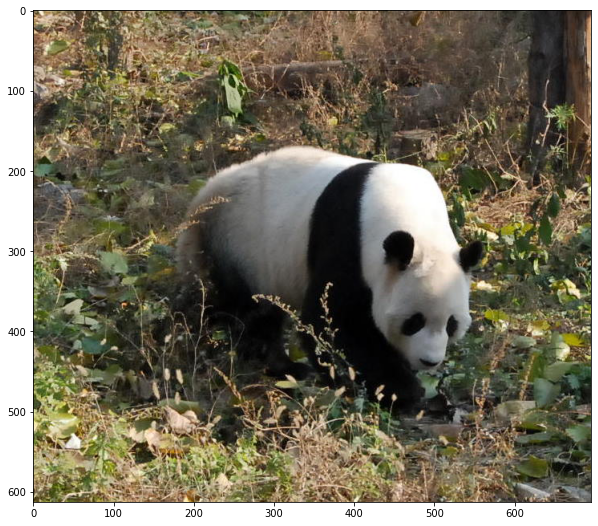

In [3]:
# test image
image = imread('../misc/panda.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [4]:
# loading pretrained model
model = EfficientNetB0(weights='imagenet')







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
# preprocess input
image_size = model.input_shape[1]
x = center_crop_and_resize(image, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)

# make prediction and decode
y = model.predict(x)
decode_predictions(y)

[[('n02510455', 'giant_panda', 0.7587872),
  ('n02134084', 'ice_bear', 0.008354742),
  ('n02132136', 'brown_bear', 0.007207233),
  ('n02509815', 'lesser_panda', 0.004130225),
  ('n02120079', 'Arctic_fox', 0.00402107)]]